In [2]:
В файле 'test_1.csv' лежит результат теста с произвольной метрикой target. Посмотрим на данные и  найдем статистическую разницу, 
используя гипотезу о средних.

SyntaxError: invalid syntax (<ipython-input-2-a16a93569828>, line 1)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
%pylab inline

In [2]:
data=pd.read_csv('test_1.csv')

In [3]:
#Просто посмотрю на данные:
data.describe()

,client_id,target
count,1998.000000,1998.000000
mean,999.500000,50.507059
std,576.917238,2.567579
min,1.000000,41.987265
25%,500.250000,48.787705
50%,999.500000,50.484900
75%,1498.750000,52.219054
max,1998.000000,59.856546


In [4]:
data.groupby("group").agg({'client_id':'count'})

,client_id
group,
control,988
test,1010


In [5]:
Atarget=data[0:1010] #тест
Btarget=data[1010::]#контроль
Btarget.head()

,group,client_id,target
1010,control,1011,51.384842
1011,control,1012,52.147493
1012,control,1013,50.052900
1013,control,1014,50.892682
1014,control,1015,51.457104


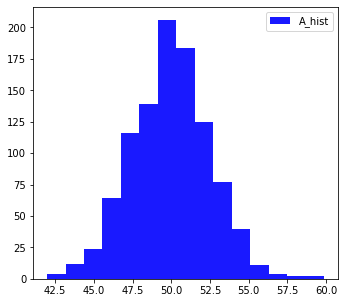

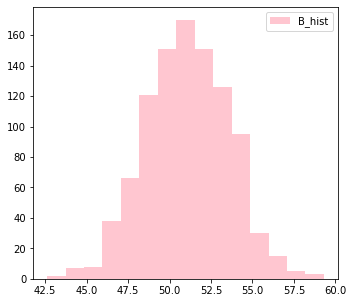

In [6]:
#Убедимся что наши подвыборки распределены нормально
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(Atarget['target'],
           bins = 15,
           color = 'blue',
           alpha = 0.9,
           label = 'A_hist')
pylab.legend()

pylab.figure(figsize(12, 5))
pylab.subplot(1,2,2)
pylab.hist(Btarget['target'],
           bins = 15,
           color = 'pink',
           alpha = 0.9,
           label = 'B_hist')
pylab.legend()
pylab.show()




In [7]:
#Значит можем восплользоваться критерием Стьюдента:
Amean=np.mean(Atarget.target)  #средние
Bmean=np.mean(Btarget.target)
print('Среднее А',Amean)
print('Среднее В', Bmean)
dif=Amean-Bmean
Alen=len(Atarget) #длины подвыборок
Blen=len(Btarget)
Ds_A=np.var(Atarget.target,ddof=1) #дисперсии
Ds_B=np.var(Btarget.target,ddof=1)
sdA=sqrt(Ds_A)  #стандартные отклонения
sdB=sqrt(Ds_B)
v=sqrt(sdA**2/Alen + sdB**2/Blen) #стандартная ошибка отклонения
t=dif/v
print('Статистика', t)

Среднее А 49.958943954077576
Среднее В 51.06737874869835
Статистика -9.879422047254534


In [8]:
x = np.linspace(-5.0, 5.0, 100)
#степени свободы
k = Alen+Blen - 2
print('Количество степеней свободы', k)

Количество степеней свободы 1996


p_value =  8.314399342638953e-23


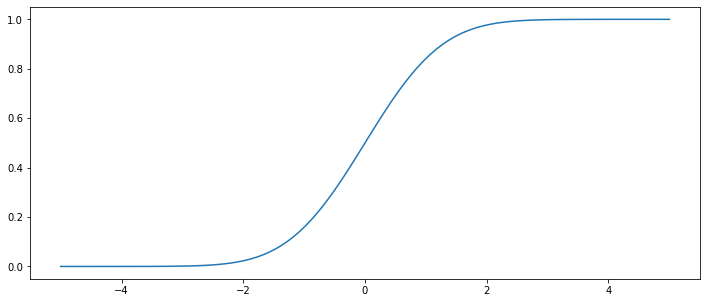

In [9]:
#Найдем p-value
plt.plot(x,stats.t.cdf(x, k) )
pvalue=stats.t.cdf( t, k)
print("p_value = ",pvalue)

In [10]:
#Имеем:
if pvalue> 0.05: 
    print('Нет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',pvalue)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t,'\np-value =',pvalue)

Есть статистически значимая разница 
t - критерий =  -9.879422047254534 
p-value = 8.314399342638953e-23
